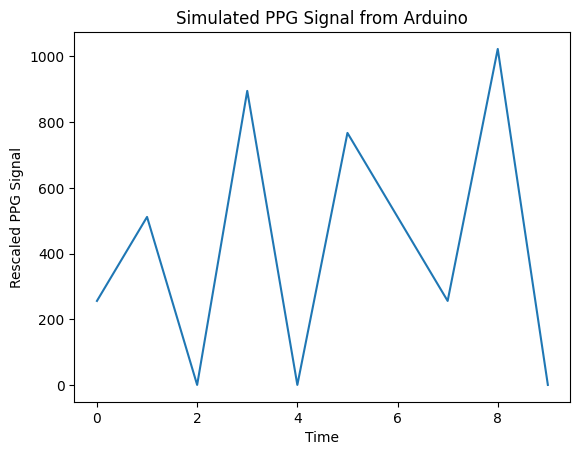

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset using pandas
dataset_path = "/content/minor dataset - Sheet1 (1).csv"
df = pd.read_csv(dataset_path)

# Extract the PPG Signal (Heart Rate) column from the dataset
ppg_signal = df['PPG SIGNAL']

# Rescale the data to match the range of the Arduino serial plotter
rescaled_ppg_signal = (ppg_signal - min(ppg_signal)) * (1023 - 0) / (max(ppg_signal) - min(ppg_signal)) + 0

# Plot the data as an image
plt.plot(rescaled_ppg_signal)
plt.xlabel('Time')
plt.ylabel('Rescaled PPG Signal')
plt.title('Simulated PPG Signal from Arduino')
plt.show()



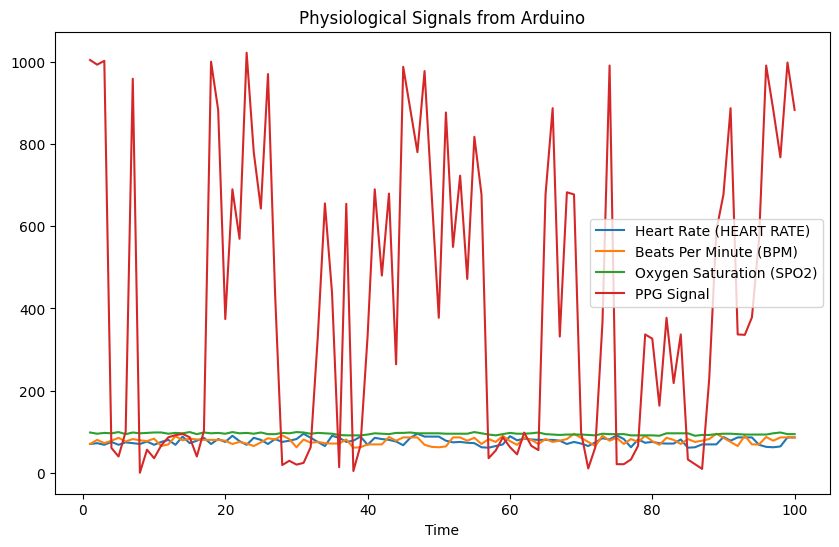

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = "/content/minor dataset.csv"
df = pd.read_csv(file_path)

# Rescale the PPG data if needed
df['PPG SIGNAL'] = (df['PPG SIGNAL'] - min(df['PPG SIGNAL'])) * (1023 - 0) / (max(df['PPG SIGNAL']) - min(df['PPG SIGNAL'])) + 0

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(df['ID'], df['HEART RATE'], label='Heart Rate (HEART RATE)')
plt.plot(df['ID'], df['BPM'], label='Beats Per Minute (BPM)')
plt.plot(df['ID'], df['SPO2'], label='Oxygen Saturation (SPO2)')
plt.plot(df['ID'], df['PPG SIGNAL'], label='PPG Signal')
plt.xlabel('Time')
plt.title('Physiological Signals from Arduino')
plt.legend()
plt.show()


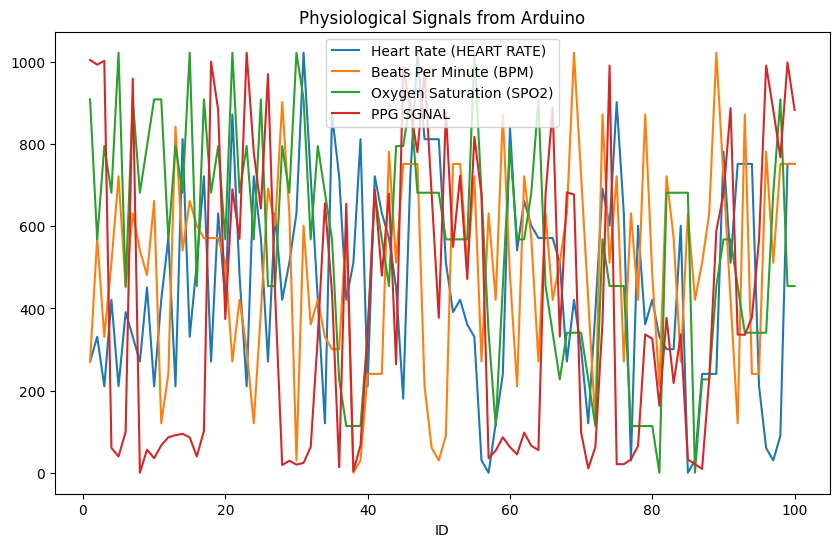

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file
file_path = "/content/minor dataset.csv"
df = pd.read_csv(file_path)

# Rescale the signals if needed
for column in ['HEART RATE', 'BPM', 'SPO2', 'PPG SIGNAL']:
    df[column] = (df[column] - min(df[column])) * (1023 - 0) / (max(df[column]) - min(df[column])) + 0

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(df['ID'], df['HEART RATE'], label='Heart Rate (HEART RATE)')
plt.plot(df['ID'], df['BPM'], label='Beats Per Minute (BPM)')
plt.plot(df['ID'], df['SPO2'], label='Oxygen Saturation (SPO2)')
plt.plot(df['ID'], df['PPG SIGNAL'], label='PPG SGNAL')
plt.xlabel('ID')
plt.title('Physiological Signals from Arduino')
plt.legend()
plt.show()


filteration

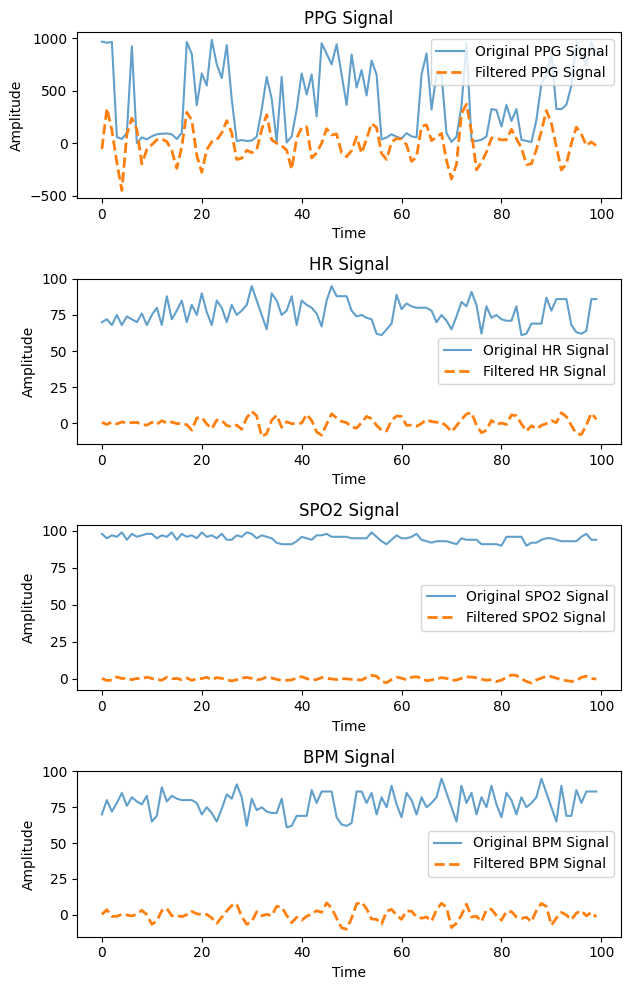

In [ ]:
import numpy as np
from scipy import signal as scipy_signal
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset using pandas
dataset_path = "/content/minor dataset.csv"
df = pd.read_csv(dataset_path)

# Extract the signals
ppg_signal = df['PPG SIGNAL']
hr_signal = df['HEART RATE']
spo2_signal = df['SPO2']
bpm_signal = df['BPM']

# Define the filtering functions
def remove_high_frequency_noise(signal, sampling_rate, cutoff_freq):
    b, a = scipy_signal.butter(4, cutoff_freq, fs=sampling_rate, btype='high', analog=False)
    filtered_signal = scipy_signal.filtfilt(b, a, signal, padlen=5)
    return filtered_signal

def remove_low_frequency_noise(signal, window_length, polyorder):
    filtered_signal = scipy_signal.savgol_filter(signal, window_length, polyorder)
    return filtered_signal

def correct_baseline_drift(signal, degree):
    time = np.arange(len(signal))
    polynomial_coefficients = np.polyfit(time, signal, degree)
    baseline = np.polyval(polynomial_coefficients, time)
    corrected_signal = signal - baseline
    return corrected_signal

# Define filtering parameters
sampling_rate = 1  # Replace this with your actual sampling rate
cutoff_frequency = 0.1  # Adjust this value based on your noise characteristics
window_length = 5  # Adjust this value based on your signal characteristics
poly_order = 3  # Adjust this value based on your baseline characteristics

# Apply filtering to each signal
filtered_ppg = remove_high_frequency_noise(ppg_signal, sampling_rate, cutoff_frequency)
filtered_ppg = remove_low_frequency_noise(filtered_ppg, window_length, poly_order)
filtered_ppg = correct_baseline_drift(filtered_ppg, poly_order)

filtered_hr = remove_high_frequency_noise(hr_signal, sampling_rate, cutoff_frequency)
filtered_hr = remove_low_frequency_noise(filtered_hr, window_length, poly_order)
filtered_hr = correct_baseline_drift(filtered_hr, poly_order)

filtered_spo2 = remove_high_frequency_noise(spo2_signal, sampling_rate, cutoff_frequency)
filtered_spo2 = remove_low_frequency_noise(filtered_spo2, window_length, poly_order)
filtered_spo2 = correct_baseline_drift(filtered_spo2, poly_order)

filtered_bpm = remove_high_frequency_noise(bpm_signal, sampling_rate, cutoff_frequency)
filtered_bpm = remove_low_frequency_noise(filtered_bpm, window_length, poly_order)
filtered_bpm = correct_baseline_drift(filtered_bpm, poly_order)

# Plot the original and filtered signals for comparison
plt.figure(figsize=(12, 10))

plt.subplot(4, 2, 1)
plt.plot(ppg_signal, label='Original PPG Signal', alpha=0.7)
plt.plot(filtered_ppg, label='Filtered PPG Signal', linestyle='dashed', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('PPG Signal')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(hr_signal, label='Original HR Signal', alpha=0.7)
plt.plot(filtered_hr, label='Filtered HR Signal', linestyle='dashed', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('HR Signal')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(spo2_signal, label='Original SPO2 Signal', alpha=0.7)
plt.plot(filtered_spo2, label='Filtered SPO2 Signal', linestyle='dashed', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('SPO2 Signal')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(bpm_signal, label='Original BPM Signal', alpha=0.7)
plt.plot(filtered_bpm, label='Filtered BPM Signal', linestyle='dashed', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('BPM Signal')
plt.legend()

plt.tight_layout()
plt.show()


feature extraction

In [ ]:
import numpy as np
from scipy.signal import welch
import pywt
import pandas as pd

# Load the dataset using pandas
dataset_path = "/content/minor dataset.csv"
df = pd.read_csv(dataset_path)

# Extract the signals from the dataset
ppg_signal = df['PPG SIGNAL']
heart_rate_signal = df['HEART RATE']
spo2_signal = df['SPO2']
bpm_signal = df['BPM']

# Define functions to extract features
def calculate_zero_crossing_rate(signal):
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    return len(zero_crossings)

def calculate_autocorrelation(signal):
    autocorr = np.correlate(signal, signal, mode='full')
    return autocorr

def calculate_power_spectral_density(signal, sampling_rate):
    f, Pxx = welch(signal, fs=sampling_rate)
    return f, Pxx

def calculate_kaiser_teager_energy(signal):
    kte = signal**2 - np.roll(signal, 1) * np.roll(signal, -1)
    return kte

def calculate_wavelet_analysis(signal):
    cA, cD = pywt.dwt(signal, 'db4')
    return np.mean(np.abs(cA))

# Sampling rate (replace with your actual sampling rate)
sampling_rate = 1

# Compute features for ppg_signal
zcr_ppg = calculate_zero_crossing_rate(ppg_signal)
autocorr_ppg = calculate_autocorrelation(ppg_signal)
frequencies_ppg, psd_ppg = calculate_power_spectral_density(ppg_signal, sampling_rate)
kte_ppg = calculate_kaiser_teager_energy(ppg_signal)
wavelet_feature_ppg = calculate_wavelet_analysis(ppg_signal)

# Compute features for heart_rate_signal
zcr_heart_rate = calculate_zero_crossing_rate(heart_rate_signal)
autocorr_heart_rate = calculate_autocorrelation(heart_rate_signal)
frequencies_heart_rate, psd_heart_rate = calculate_power_spectral_density(heart_rate_signal, sampling_rate)
kte_heart_rate = calculate_kaiser_teager_energy(heart_rate_signal)
wavelet_feature_heart_rate = calculate_wavelet_analysis(heart_rate_signal)

# Compute features for spo2_signal
zcr_spo2 = calculate_zero_crossing_rate(spo2_signal)
autocorr_spo2 = calculate_autocorrelation(spo2_signal)
frequencies_spo2, psd_spo2 = calculate_power_spectral_density(spo2_signal, sampling_rate)
kte_spo2 = calculate_kaiser_teager_energy(spo2_signal)
wavelet_feature_spo2 = calculate_wavelet_analysis(spo2_signal)

# Compute features for bpm_signal
zcr_bpm = calculate_zero_crossing_rate(bpm_signal)
autocorr_bpm = calculate_autocorrelation(bpm_signal)
frequencies_bpm, psd_bpm = calculate_power_spectral_density(bpm_signal, sampling_rate)
kte_bpm = calculate_kaiser_teager_energy(bpm_signal)
wavelet_feature_bpm = calculate_wavelet_analysis(bpm_signal)

# Print the extracted features for ppg_signal
print("For PPG Signal:")
print("Zero Crossing Rate:", zcr_ppg)
print("Autocorrelation:", autocorr_ppg)
print("Power Spectral Density Frequencies:", frequencies_ppg)
print("Power Spectral Density:", psd_ppg)
print("Kaiser-Teager Energy:", kte_ppg)
print("Wavelet Feature:", wavelet_feature_ppg)
print("\n")

# Print the extracted features for heart_rate_signal
print("For Heart Rate Signal:")
print("Zero Crossing Rate:", zcr_heart_rate)
print("Autocorrelation:", autocorr_heart_rate)
print("Power Spectral Density Frequencies:", frequencies_heart_rate)
print("Power Spectral Density:", psd_heart_rate)
print("Kaiser-Teager Energy:", kte_heart_rate)
print("Wavelet Feature:", wavelet_feature_heart_rate)
print("\n")

# Print the extracted features for spo2_signal
print("For SPO2 Signal:")
print("Zero Crossing Rate:", zcr_spo2)
print("Autocorrelation:", autocorr_spo2)
print("Power Spectral Density Frequencies:", frequencies_spo2)
print("Power Spectral Density:", psd_spo2)
print("Kaiser-Teager Energy:", kte_spo2)
print("Wavelet Feature:", wavelet_feature_spo2)
print("\n")

# Print the extracted features for bpm_signal
print("For BPM Signal:")
print("Zero Crossing Rate:", zcr_bpm)
print("Autocorrelation:", autocorr_bpm)
print("Power Spectral Density Frequencies:", frequencies_bpm)
print("Power Spectral Density:", psd_bpm)
print("Kaiser-Teager Energy:", kte_bpm)
print("Wavelet Feature:", wavelet_feature_bpm)


For PPG Signal:
Zero Crossing Rate: 0
Autocorrelation: [  825588  1749363  2464467  2517807  2550987  2437220  2767324  2252006
  1870845  2467797  2875260  2793251  2120183  1530570  1097327  1366646
  1493419  2371796  3127573  2959287  3587432  4198091  4822804  4652113
  4632762  4887725  6530425  6527365  5845061  4565503  3480858  3855254
  5304329  5500558  5861169  5420906  5383432  4870031  4015755  3585374
  4612894  4690784  4819071  5890350  6794157  7435036  7734591  7981928
  9019216  9935057 10350562 11605751 11386001 11314510 11762635 12110120
 11261141 10678223  9532620  9432569  8465216  7535449  7038406  7504901
  8133187  9815227 10330855 11023186 11470982 11144847 10958017 11564713
 11413795 12123401 13040344 13115933 14157145 14118661 13124484 12809280
 12866202 12863436 12907564 12840547 11577571 11046795  9753749 10165215
 11302740 10893781 11480886 13389435 12692055 14166596 14901582 15523052
 16235616 18082963 21416526 27730843 21416526 18082963 16235616 15523

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '


ml


Mean Squared Error (RF): 200.481185
Mean Squared Error (XGB): 258.275223374684


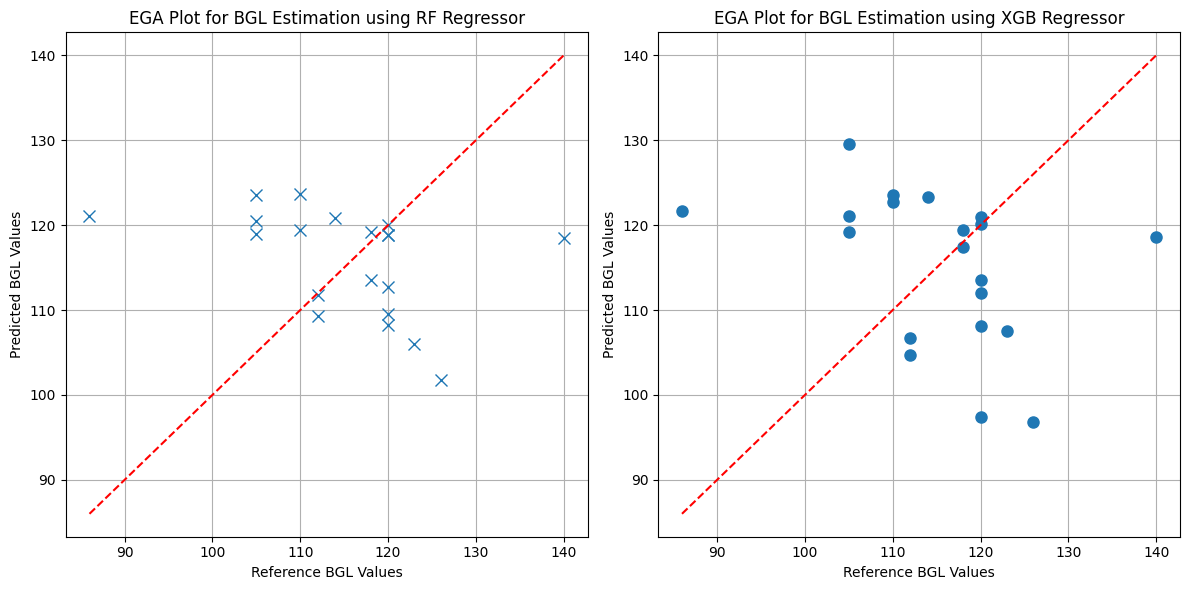

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your dataset from CSV
feature_data = pd.read_csv('/content/minor dataset.csv')  # Update with your actual file path
feature_datas = pd.read_csv('/content/Untitled spreadsheet - Sheet1.csv')
# Assuming 'BG' is the column you want to predict (replace 'BG' with the actual column name)

y = feature_data['BLOOD GLUCOSE']

# X includes all the other columns as features, excluding the label and BG columns
X = feature_datas.drop(['ID'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RF and XGB regressors
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Fit the models on the training set
rf_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)

# Predictions from the models on the test set
predicted_rf = rf_regressor.predict(X_test)
predicted_xgb = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error for both models
mse_rf = mean_squared_error(y_test, predicted_rf)
mse_xgb = mean_squared_error(y_test, predicted_xgb)

# Print Mean Squared Error
print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Mean Squared Error (XGB): {mse_xgb}')

# Create the EGA plots for both regressors
plt.figure(figsize=(12, 6))

# EGA plot for RF regressor
plt.subplot(1, 2, 1)
plt.plot(y_test, predicted_rf, 'x', markersize=8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.title('EGA Plot for BGL Estimation using RF Regressor')
plt.xlabel('Reference BGL Values')
plt.ylabel('Predicted BGL Values')
plt.grid(True)

# EGA plot for XGB regressor
plt.subplot(1, 2, 2)
plt.plot(y_test, predicted_xgb, 'o', markersize=8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.title('EGA Plot for BGL Estimation using XGB Regressor')
plt.xlabel('Reference BGL Values')
plt.ylabel('Predicted BGL Values')
plt.grid(True)

plt.tight_layout()
plt.show()


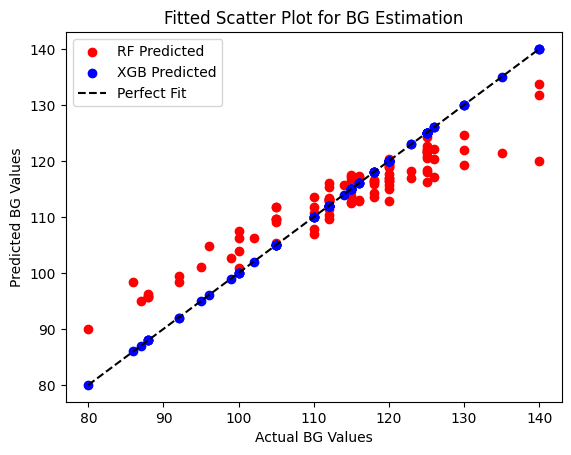

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load your dataset
feature_data = pd.read_csv('/content/minor dataset.csv')  # Update with your actual file path
feature_datas = pd.read_csv('/content/Untitled spreadsheet - Sheet1.csv')  # Update with your actual file path

# Assuming 'BG' is the column you want to predict (replace 'BG' with the actual column name)
y = feature_data['BLOOD GLUCOSE']

# X includes all the other columns as features, excluding the label and BG columns
X = feature_datas.drop(['ID'], axis=1)

# Initialize the RF and XGB regressors
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Fit the models
rf_regressor.fit(X, y)
xgb_regressor.fit(X, y)

# Predictions from the models
predicted_rf = rf_regressor.predict(X)
predicted_xgb = xgb_regressor.predict(X)

# Create the fitted scatter plot
plt.scatter(y, predicted_rf, color='red', label='RF Predicted')
plt.scatter(y, predicted_xgb, color='blue', label='XGB Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='black', label='Perfect Fit')
plt.xlabel('Actual BG Values')
plt.ylabel('Predicted BG Values')
plt.title('Fitted Scatter Plot for BG Estimation')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
feature_data = pd.read_csv('/content/Untitled spreadsheet - Sheet1.csv')  # Update with your actual file path
feature_datas = pd.read_csv('/content/minor dataset.csv')  # Update with your actual file path

# Assuming 'BG' is the column you want to predict (replace 'BG' with the actual column name)
y = feature_datas['BLOOD GLUCOSE']

# X includes all the other columns as features, excluding the label and BG columns
X = feature_data.drop(['ID'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest Regressor in this example)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Evaluate the model using R-squared score
r2 = r2_score(y_test, predictions)
print(f'R-squared Score: {r2}')


Mean Squared Error: 203.15272000000004
R-squared Score: -0.8576510607168988


Mean Squared Error (RF): 200.481185
R-squared Score (RF): -0.8332222476225313


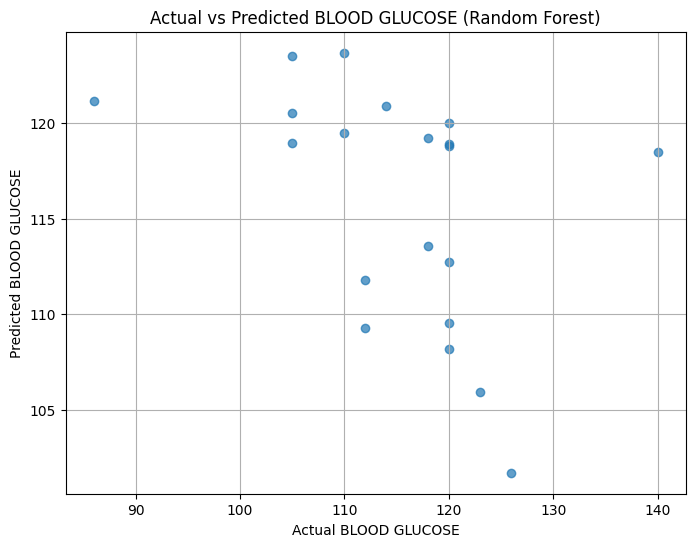

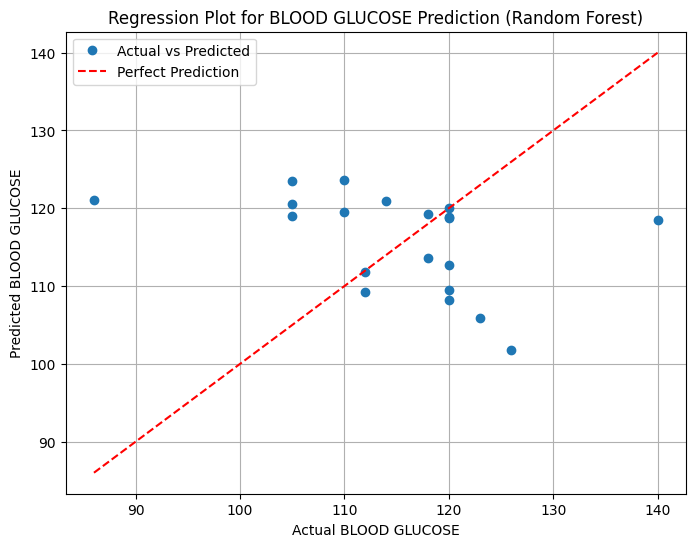

Predicted BLOOD GLUCOSE:
[118.5  112.75 108.19 109.3  113.58 120.49 118.95 118.87 118.78 101.72
 109.52 123.66 119.21 111.8  120.88 105.95 119.47 120.   123.51 121.12]
    Actual BLOOD GLUCOSE  Predicted BLOOD GLUCOSE
83                   140                   118.50
53                   120                   112.75
70                   120                   108.19
45                   112                   109.30
44                   118                   113.58
39                   105                   120.49
22                   105                   118.95
80                   120                   118.87
10                   120                   118.78
0                    126                   101.72
18                   120                   109.52
30                   110                   123.66
73                   118                   119.21
33                   112                   111.80
90                   114                   120.88
4                    123        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load your dataset from CSV
feature_data = pd.read_csv('/content/minor dataset.csv')  # Update with your actual file path
feature_datas = pd.read_csv('/content/Untitled spreadsheet - Sheet1.csv')

# Assuming 'BLOOD GLUCOSE' is the column you want to predict
y = feature_data['BLOOD GLUCOSE']

# X includes all the other columns as features, excluding the label and BLOOD GLUCOSE columns
X = feature_datas.drop(['ID'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_regressor.fit(X_train, y_train)

# Predictions from the model on the test set
predicted_rf = rf_regressor.predict(X_test)

# Calculate Mean Squared Error and R-squared Score
mse_rf = mean_squared_error(y_test, predicted_rf)
r2_rf = r2_score(y_test, predicted_rf)

# Print Mean Squared Error and R-squared Score
print(f'Mean Squared Error (RF): {mse_rf}')
print(f'R-squared Score (RF): {r2_rf}')

# Visualize the results
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_rf, alpha=0.7)
plt.title('Actual vs Predicted BLOOD GLUCOSE (Random Forest)')
plt.xlabel('Actual BLOOD GLUCOSE')
plt.ylabel('Predicted BLOOD GLUCOSE')
plt.grid(True)
plt.show()

# Regression plot
plt.figure(figsize=(8, 6))
plt.plot(y_test, predicted_rf, 'o', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Perfect Prediction')
plt.title('Regression Plot for BLOOD GLUCOSE Prediction (Random Forest)')
plt.xlabel('Actual BLOOD GLUCOSE')
plt.ylabel('Predicted BLOOD GLUCOSE')
plt.legend()
plt.grid(True)
plt.show()

print("Predicted BLOOD GLUCOSE:")
print(predicted_rf)

results_df = pd.DataFrame({'Actual BLOOD GLUCOSE': y_test, 'Predicted BLOOD GLUCOSE': predicted_rf})

# Display the DataFrame
print(results_df)

    Actual BLOOD GLUCOSE  Predicted BLOOD GLUCOSE (XGB)
83                   140                     118.606392
53                   120                     113.523567
70                   120                     108.079338
45                   112                     104.653107
44                   118                     117.394341
39                   105                     121.056168
22                   105                     119.244316
80                   120                     120.127525
10                   120                     111.946266
0                    126                      96.790916
18                   120                      97.358490
30                   110                     122.740517
73                   118                     119.432045
33                   112                     106.660629
90                   114                     123.274734
4                    123                     107.511528
76                   110                     123

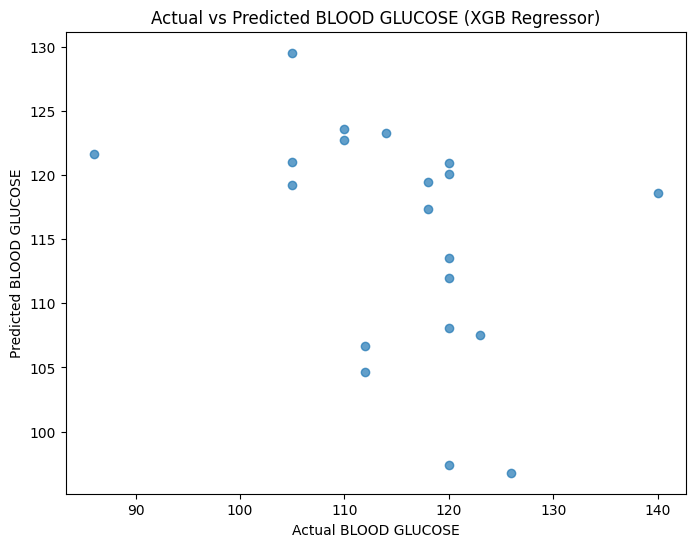

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset from CSV
feature_data = pd.read_csv('/content/minor dataset.csv')  # Update with your actual file path
feature_datas = pd.read_csv('/content/Untitled spreadsheet - Sheet1.csv')

# Assuming 'BG' is the column you want to predict (replace 'BG' with the actual column name)
y = feature_data['BLOOD GLUCOSE']

# X includes all the other columns as features, excluding the label and BG columns
X = feature_datas.drop(['ID'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGB regressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
xgb_regressor.fit(X_train, y_train)

# Predictions from the model on the test set
predicted_xgb = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse_xgb = mean_squared_error(y_test, predicted_xgb)
r2_xgb = r2_score(y_test, predicted_xgb)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Actual BLOOD GLUCOSE': y_test,
    'Predicted BLOOD GLUCOSE (XGB)': predicted_xgb
})

# Display the results
print(results_df)

# Print Mean Squared Error and R-squared
print(f'Mean Squared Error (XGB): {mse_xgb}')
print(f'R-squared (XGB): {r2_xgb}')

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_xgb, alpha=0.7)
plt.title('Actual vs Predicted BLOOD GLUCOSE (XGB Regressor)')
plt.xlabel('Actual BLOOD GLUCOSE')
plt.ylabel('Predicted BLOOD GLUCOSE')
plt.show()


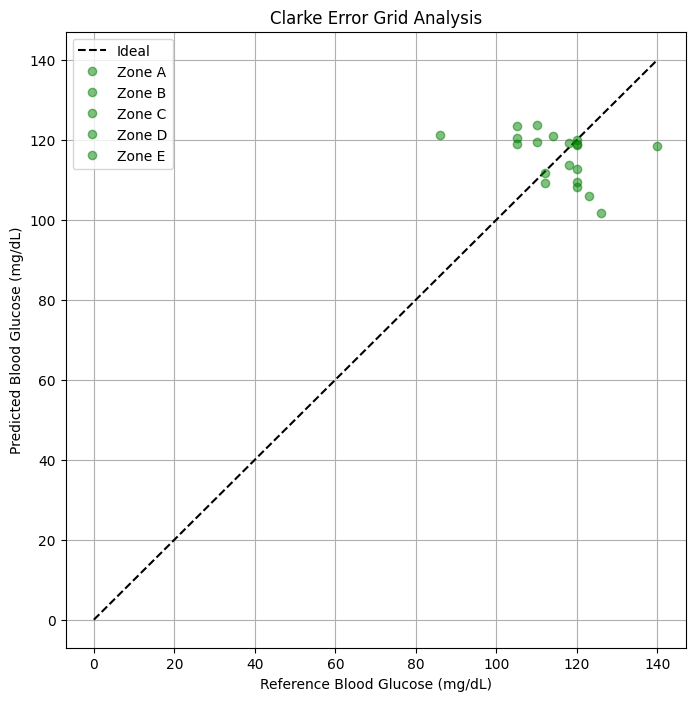

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the reference and predicted values from the RF regressor
reference_values = [140,120,120,112,118,105,105,120,120,126,120,110,118,112,114,123,110,120,105,86]  # Replace with actual reference values
predicted_values = [118.5,112.75,108.19,109.30,113.58,120.49,118.95,118.87,118.78,101.72,109.52,123.66,119.21,111.80,120.88,105.95,119.47,120,123.51,121.12]
# Define the zones of the Clarke Error Grid
zones = {
    'A': [(70, 180), (70, 150)],
    'B': [(70, 180), (150, 300)],
    'C': [(180, 300), (70, 150)],
    'D': [(180, 300), (150, 300)],
    'E': [(300, np.inf), (0, np.inf)],
}

# Create the Clarke Error Grid
plt.figure(figsize=(8, 8))
plt.plot([0, np.max(reference_values)], [0, np.max(reference_values)], '--', color='black')

# Plot each point on the grid
for ref, pred in zip(reference_values, predicted_values):
    for zone, (x, y) in zones.items():
        if x[0] <= ref <= x[1] and y[0] <= pred <= y[1]:
            plt.plot(ref, pred, 'o', color='green' if zone == 'A' else 'red', alpha=0.5)
            break

# Customize the plot
plt.title('Clarke Error Grid Analysis')
plt.xlabel('Reference Blood Glucose (mg/dL)')
plt.ylabel('Predicted Blood Glucose (mg/dL)')
plt.legend(['Ideal', 'Zone A', 'Zone B', 'Zone C', 'Zone D', 'Zone E'])
plt.grid(True)
plt.show()


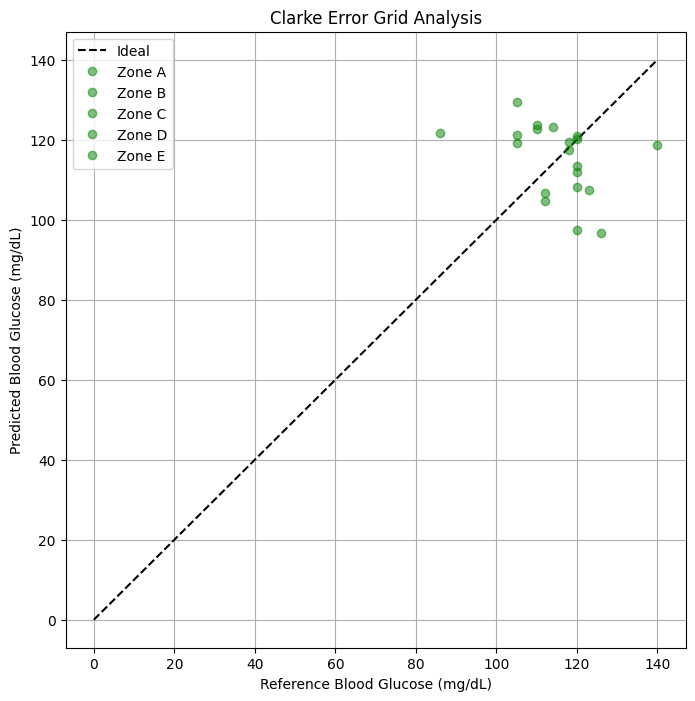

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def clarke_error_grid(reference_values, predicted_values):
    # Define the zones of the Clarke Error Grid
    zones = {
        'A': [(70, 180), (70, 150)],
        'B': [(70, 180), (150, 300)],
        'C': [(180, 300), (70, 150)],
        'D': [(180, 300), (150, 300)],
        'E': [(300, np.inf), (0, np.inf)],
    }

    # Create the Clarke Error Grid
    plt.figure(figsize=(8, 8))
    plt.plot([0, np.max(reference_values)], [0, np.max(reference_values)], '--', color='black')

    # Plot each point on the grid
    for ref, pred in zip(reference_values, predicted_values):
        for zone, (x, y) in zones.items():
            if x[0] <= ref <= x[1] and y[0] <= pred <= y[1]:
                plt.plot(ref, pred, 'o', color='green' if zone == 'A' else 'red', alpha=0.5)
                break

    # Customize the plot
    plt.title('Clarke Error Grid Analysis')
    plt.xlabel('Reference Blood Glucose (mg/dL)')
    plt.ylabel('Predicted Blood Glucose (mg/dL)')
    plt.legend(['Ideal', 'Zone A', 'Zone B', 'Zone C', 'Zone D', 'Zone E'])
    plt.grid(True)
    plt.show()

# Example usage
reference_values = [140, 120, 120, 112, 118, 105, 105, 120, 120, 126, 120, 110, 118, 112, 114, 123, 110, 120, 105, 86]
predicted_values = [118.606392, 113.523567, 108.079338, 104.653107, 117.394341, 121.056168, 119.244316, 120.127525, 111.946266, 96.790916, 97.358490, 122.740517, 119.432045, 106.660629, 123.274734, 107.511528, 123.600609, 120.951530, 129.547943, 121.647751]

clarke_error_grid(reference_values, predicted_values)
